# Importing libraries

In [121]:
# Import libraries
import csv
import pandas as pd
import sklearn
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.model_selection import train_test_split

# Load the dataset

In [122]:
# Load the dataset

data = pd.read_csv("./data/SMSSpamCollection",sep='\t', quoting=csv.QUOTE_NONE,
                           names=["class", "sms"])

In [123]:
data.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [124]:
# some statistics
data.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4827   4518                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

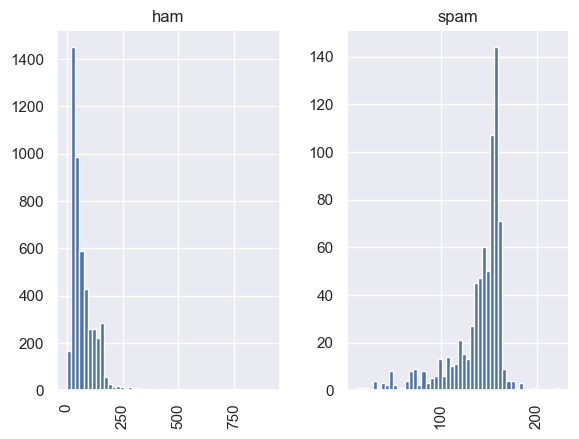

In [125]:
## Distribution of length of sms for spam and ham
data['length'] = data['sms'].map(lambda text: len(text))
data.hist(column='length', by='class', bins=50)

## Storing the raw_data

data.to_csv('data/raw_data.csv', index = False)

# Split the dataset

In [12]:
# Split dataset
train, temp = train_test_split(data, test_size = 0.3, random_state = 1234)
val, test = train_test_split(temp, test_size = 0.5, random_state = 1234)

In [19]:
# storing the split data
train.to_csv('data/train.csv', index = False)
val.to_csv('data/validation.csv', index = False)
test.to_csv('data/test.csv', index = False)

In [17]:
!dvc init --subdir -f

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [28]:
!dvc add data/train.csv data/test.csv data/validation.csv


To track the changes with git, run:

	git add 'data\validation.csv.dvc' 'data\.gitignore' 'data\test.csv.dvc' 'data\train.csv.dvc'

To enable auto staging, run:

	dvc config core.autostage true


\u280b Checking graph



In [32]:
!git add data/validation.csv.dvc data/.gitignore data/test.csv.dvc data/train.csv.dvc

In [33]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   data/.gitignore
	new file:   data/test.csv.dvc
	new file:   data/train.csv.dvc
	new file:   data/validation.csv.dvc

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   prepare.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	data/raw_data.csv



In [34]:
! git commit -m "First version of data"

[main 18f6083] First version of data
 4 files changed, 18 insertions(+)
 create mode 100644 Assignment 2/data/test.csv.dvc
 create mode 100644 Assignment 2/data/train.csv.dvc
 create mode 100644 Assignment 2/data/validation.csv.dvc


In [35]:
!git push

To https://github.com/nikita-12-com/AppliedMachineLearning.git
   7891e99..18f6083  main -> main


# Updating the split using different random seed

In [37]:
# Split dataset
train, temp = train_test_split(data, test_size = 0.3, random_state = 1)
val, test = train_test_split(temp, test_size = 0.5, random_state = 1)

In [38]:
# storing the split data
train.to_csv('data/train.csv', index = False)
val.to_csv('data/validation.csv', index = False)
test.to_csv('data/test.csv', index = False)

In [39]:
!dvc status

data\SMSSpamCollection.dvc:
	changed outs:
		not in cache:       data\SMSSpamCollection
data\test.csv.dvc:
	changed outs:
		modified:           data\test.csv
data\train.csv.dvc:
	changed outs:
		modified:           data\train.csv
data\validation.csv.dvc:
	changed outs:
		modified:           data\validation.csv


In [40]:
!dvc add data/train.csv data/test.csv data/validation.csv

\u280b Checking graph




To track the changes with git, run:

	git add 'data\test.csv.dvc' 'data\validation.csv.dvc' 'data\train.csv.dvc'

To enable auto staging, run:

	dvc config core.autostage true


In [41]:
!git add data/validation.csv.dvc data/.gitignore data/test.csv.dvc data/train.csv.dvc

In [43]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   data/test.csv.dvc
	modified:   data/train.csv.dvc
	modified:   data/validation.csv.dvc

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   prepare.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	data/raw_data.csv



In [44]:
! git commit -m "Second version of data"

[main 6cfa908] Second version of data
 3 files changed, 6 insertions(+), 6 deletions(-)


In [45]:
!git push

To https://github.com/nikita-12-com/AppliedMachineLearning.git
   18f6083..6cfa908  main -> main


In [47]:
! git log -2

commit 6cfa908197b7dc3e1b1ee55d87ce6997d8de035c
Author: nikita <nikitadreams100@gmail.com>
Date:   Sat Mar 1 13:28:31 2025 +0530

    Second version of data

commit 18f60831b075098caa56edf2b4813ba14e81044b
Author: nikita <nikitadreams100@gmail.com>
Date:   Sat Mar 1 13:17:32 2025 +0530

    First version of data


# Checkout first version

In [48]:
!git checkout 18f60831b075098caa56edf2b4813ba14e81044b data/train.csv.dvc data/validation.csv.dvc data/test.csv.dvc

Updated 3 paths from 914deee


In [49]:
!dvc checkout

M       data\test.csv
M       data\validation.csv
M       data\train.csv


## Class distribution of the first version of data

In [106]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
val_data = pd.read_csv("./data/validation.csv")

# Encoding the classes of train, test, and validation 
train_data['class'] = train_data['class'].map({'spam': 1, 'ham': 0})
val_data['class'] = val_data['class'].map({'spam': 1, 'ham': 0})
test_data['class'] = test_data['class'].map({'spam': 1, 'ham': 0})

# Class distribution
print("1st version: Class distribution")
print("Training data:\n", train_data['class'].value_counts())
print("Test data:\n", test_data['class'].value_counts())
print("Validation data:\n", val_data['class'].value_counts())

1st version: Class distribution
Training data:
 class
0    3373
1     528
Name: count, dtype: int64
Test data:
 class
0    731
1    106
Name: count, dtype: int64
Validation data:
 class
0    723
1    113
Name: count, dtype: int64


# Checkout second version 

In [114]:
!git checkout 6cfa908197b7dc3e1b1ee55d87ce6997d8de035c data/train.csv.dvc data/validation.csv.dvc data/test.csv.dvc

Updated 3 paths from 8a4214b


In [115]:
!dvc checkout

M       data\train.csv
M       data\validation.csv
M       data\test.csv


## Class distribution of the second version of data

In [118]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
val_data = pd.read_csv("./data/validation.csv")

# Encoding the classes of train, test, and validation 
train_data['class'] = train_data['class'].map({'spam': 1, 'ham': 0})
val_data['class'] = val_data['class'].map({'spam': 1, 'ham': 0})
test_data['class'] = test_data['class'].map({'spam': 1, 'ham': 0})

# Class distribution
print("1st version: Class distribution")
print("Training data:\n", train_data['class'].value_counts())
print("Test data:\n", test_data['class'].value_counts())
print("Validation data:\n", val_data['class'].value_counts())

1st version: Class distribution
Training data:
 class
0    3376
1     525
Name: count, dtype: int64
Test data:
 class
0    734
1    103
Name: count, dtype: int64
Validation data:
 class
0    717
1    119
Name: count, dtype: int64
